In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys,os

In [2]:
%matplotlib inline

In [3]:
import lsst.daf.persistence

In [4]:
data_imsim = '/global/cscratch1/sd/desc/DC2/data/Run1.2i/rerun/coadd'
data_multiband = '/global/cscratch1/sd/desc/DC2/data/Run1.2i/rerun/multiband'
butler_x = lsst.daf.persistence.Butler(data_multiband)

In [5]:
def get_nexposures_good_objects(butler_x,tract=4639,patches=['0,0','0,1'],band='i'):
    """find big list of how many coadds contributed to each "clean" object in tract 'tract'
       and patches in 'patches' and in band 'band'
       All this does is grab the parameter 'base_InputCount_value' for a masked set of objects 
       and return a big list of them.
    input: 
    butler_x:  butler instance
        the butler for the specific data
    tract int
        specific tract id
    patches: list of pairs of ints
        list of patches to include
    band: string
        which of the ugrizy bands to check
    returns: array of integers
    array of integers containing number of visits included in each coadd object
    """
    num_images = []
    for xpatch in patches:
        #    coaddID = dict(tract=4639,patch=xpatch,filter='i')
        sources = butler_x.get('deepCoadd_forced_src', tract=tract,patch=xpatch,filter=band)
        src_refs = butler_x.get('deepCoadd_ref',tract=tract,patch=xpatch,filter=band)
        #
        selection_mask = src_refs['detect_isPrimary'] \
        & ~sources['base_SdssCentroid_flag'] \
        & ~sources['base_PixelFlags_flag_interpolated'] \
        & ~sources['base_PixelFlags_flag_saturated'] \
        & ~sources['base_PsfFlux_flag'] \
        & ~sources['modelfit_CModel_flag'] 
        #
        nimages = sources['base_InputCount_value'][selection_mask]
        num_images.append(nimages)
    all_num_images = [item for sublist in num_images for item in sublist]
    #clever way to flatten list of lists
    return all_num_images

In [6]:
#short patch list
#patches = ['0,0','0,1']
#make a list of all patches for a full tract,this is 0-7 in first and second index
patches = []
for i in range(8):
    for j in range(8):
        patches.append('{},{}'.format(i,j))

In [7]:
band_list = ['u','g','r','i','z','y']

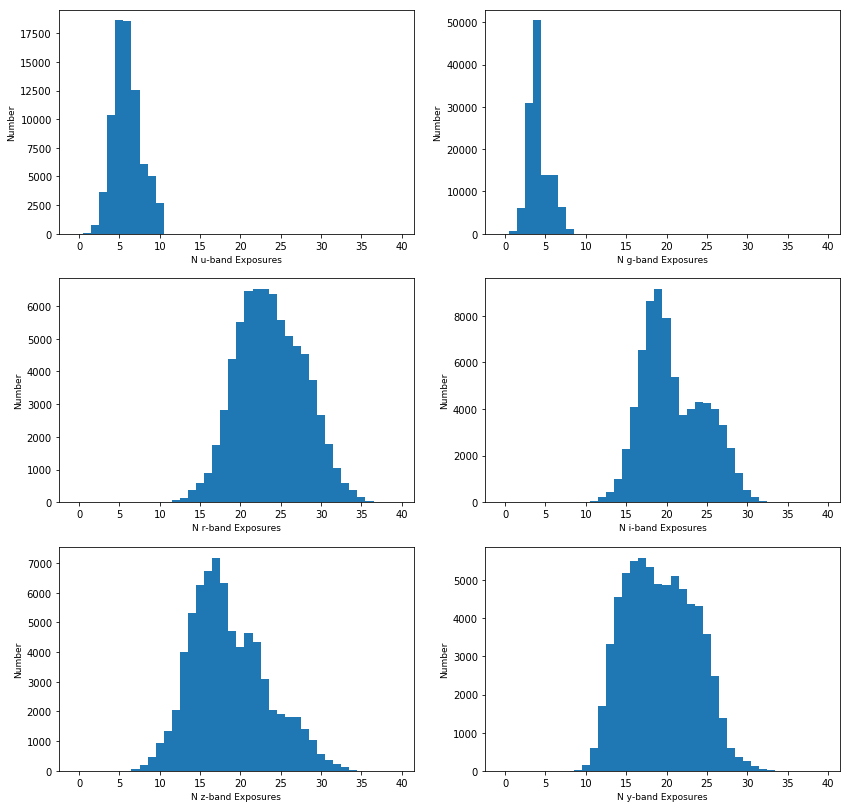

In [10]:
numrows=3
numcols = 2
mean_list = []
median_list = []
fig = plt.subplots(6,figsize=(14,14))
for i,band in enumerate(band_list):
    ax = plt.subplot(3,2,i+1)
    exp_list = get_nexposures_good_objects(butler_x,tract=4639,patches=patches,band=band)
    bin_edges=np.arange(-0.5,40.5,1.)
    ax.hist(exp_list,bins=bin_edges)
    tmp_label = "N {}-band Exposures".format(band)
    plt.xlabel(tmp_label,fontsize=9)
    plt.ylabel("Number",fontsize=9)
    tmp_mean = np.mean(exp_list)
    tmp_median = np.median(exp_list)
    mean_list.append(tmp_mean)
    median_list.append(tmp_median)

In [11]:
for i,band in enumerate(band_list):
    print ("mean {}-band exposures: {}".format(band,mean_list[i]))
    print ("median {}-band exposures: {}".format(band,median_list[i]))

mean u-band exposures: 5.964938712972421
median u-band exposures: 6.0
mean g-band exposures: 4.160766865676498
median g-band exposures: 4.0
mean r-band exposures: 23.78029230198122
median r-band exposures: 24.0
mean i-band exposures: 20.86010256968345
median i-band exposures: 20.0
mean z-band exposures: 18.586106517609437
median z-band exposures: 18.0
mean y-band exposures: 19.259001228590012
median y-band exposures: 19.0
